
<br>
<p style="font-size: 45px;
          text-align:center;
          font-family: 'Times New Roman';
          font-variant: small-caps;
          font-weight: bold;
          line-height: 50px;"> Detección de Suciedad en Paneles Solares</p>
<br>

# Primera Entrega

## Objetivo:

* Determinar si un panel solar se encuentra con o sin suciedad.

## Justificación:

<br>
<div style="text-align: justify;width:80%;margin: 0 auto"> 
Actualmente la energía solar esta incursionando en el sector energetico dada su condición de ser energía renobable amigable con el medio ambiente, de acuerdo a la UPME  y al ministerio de minas y energía, en Colombia se estima que para antes del 2030 cerca del 10% del consumo energetico va a provenir de proyectos fotovoltaicos o solares [1]. Considerando el panorama que tiene este tipo de fuente de energía es de importancia establecer protocolos de mantenimiento para los dispositivos en cuestión, una de las condiciones que más afecta la generación de energía fotovoltaica es la suciedad en los paneles[2], pues esta puede hacer que la potencia producida disminuya significativamente, teniendo consecuencias económicas en los proyectos dado que esta pérdida es energía que se deja de ofrecer en el mercado energetico.
</div>



<br>

<img src="https://deep-solar-eye.github.io/img/powerDiag.png" width=500>
<p style="text-align: center">Figura 1. Pérdidas de potencia eléctrica (W) en presencia de suciedad</p>

## Descripción de la base de datos

<br>
<div style="text-align: justify;width:80%;margin: 0 auto"> 
La base de datos con la que se cuenta en este proyecto es tomada de un trabajo previo llamado "Deep Solar Eye", el cual suministra  más de 45 000 imagenes de paneles solares bajo condiciones controladas. Las imágenes en cuestión fueron adquiridas con una cámara RGB, el experimento realizado para la adquisición de las imagenes consta una instalación de dos paneles solares identicos uno al lado del otro, con la cámara en cuestión enfocandolos, a uno de los paneles se le fue agregando diferentes tipos de suciedad, mientras que, el segundo se utilizó solo como referencia. Las imagenes tomadas fueron adquiridas en intervalos de 5 segundos al tiempo que se tomaba registro del porcentaje de pérdidas en potencia (LW%) con relación al panel de referencia.
</div>

<br>


<img src="res/Dataset.JPG" width=300>
<p style="text-align: center">Figura 2. Registro de Potencia en los paneles solares con presencia de suciedad</p>


<br>
<br>


<div style="text-align: justify;width:80%;margin: 0 auto"> 
    Cada una de las imagenes tomadas cuenta con unos metadatos en su identificación. Por un lado se tiene registro de la fecha y hora de adquisición de la imagen, por otro lado, se tiene el porcentaje de pérdida en potencia respecto al panel de referencia, y adicionalmente se tiene el dato del nivel de irrdiancia del sol en el momento en cuestión.
</div>

<br>

<img src="res/Dataset_Etiquetas.JPG" width=500>
<p style="text-align: center">Figura 3. Etiquetado de las imagenes del dataset</p>

<br>


<div style="text-align: justify;width:80%;margin: 0 auto"> 
En el dataset se cuenta con 8 tipos diferentes de suciedad (Polvo, Nieve, Excremento de ave, entre otros) que cuentan con la siguiente proporción:
</div>


<img src="res/Dataset_Distribucion.JPG" width=500>
<p style="text-align: center">Figura 4. Proporción de las clases de suciedad en el dataset</p>




# Presentación de GUI creada

### Instalación de requerimietos adicionales

In [1]:
!pip3 install -U -q ipywidgets
!jupyter labextension install @jupyter-widgets/jupyterlab-manager #(Installing into JupyterLab 1 or 2)

You should consider upgrading via the 'd:\programas\anaconda\python.exe -m pip install --upgrade pip' command.


An error occured.
ValueError: Please install Node.js and npm before continuing installation. You may be able to install Node.js from your package manager, from conda, or directly from the Node.js website (https://nodejs.org).
See the log file for details:  C:\Users\USUARIO\AppData\Local\Temp\jupyterlab-debug-w8o9h_p2.log


### Importar de librerías

In [1]:
from ipywidgets import interact, interactive
import ipywidgets as widgets

import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
from skimage import io, color
from ipywidgets import Layout
import os
%matplotlib inline


## Análisis de los espacios de color y operaciones sobre el histograma

In [3]:
import sys
sys.path.append('./utils/')
from utils.funciones_utiles import *

out1 = widgets.Output()
out2 = widgets.Output()
out3 = widgets.Output()
out4 = widgets.Output()
out5 = widgets.Output()
out6 = widgets.Output()
out7 = widgets.Output()

def analisis_espacio_color(color_space, channel, img, a, b, c, f, lineal):
    
    
    img = cv2.imread(os.path.join("img/",img+'.jpg'))
    
    img_tittle = color_space
    channel_tittle = color_space[channel-1]
    
    cs = color_space
    color_space = cv2.COLOR_BGR2RGB if color_space=='RGB' else \
                  cv2.COLOR_BGR2YUV if color_space=='YUB' else \
                  cv2.COLOR_BGR2HSV if color_space=='HSV' else \
                  cv2.COLOR_BGR2LAB if color_space=='HSL' else None
    
    img_space  = cv2.cvtColor(img, color_space)
    
    if not color_space:
        
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_R = img_rgb[:,:,0]
        img_G = img_rgb[:,:,1]
        img_B = img_rgb[:,:,2]
        
        if cs=='CMY':
            
            img_space[:,:,0] = 255 - img_R
            img_space[:,:,1] = 255 - img_G
            img_space[:,:,2] = 255 - img_B
            
        elif cs=='YIQ':
            
            img_space[:,:,0] = 0.299*img_R + 0.587*img_G + 0.114*img_B
            img_space[:,:,1] = 0.596*img_R - 0.274*img_G - 0.322*img_B
            img_space[:,:,2] = 0.211*img_R - 0.523*img_G + 0.312*img_B
        
        elif cs=='HSL':
            
            img_space = rgb2hsl(img_rgb)
            
    if lineal == 'True':
        img_space = apply_linear_function(img_space, f, [a,b,c])
        img_channel = img_space[:,:,channel-1]
    else:
        img_space = apply_non_linear_function(img_space, f, [a,b])
        img_channel = img_space[:,:,channel-1]
    
    fig, arreglo_plots = plt.subplots(1,2, figsize=(15, 8))
    colors = ('r','g','b')    
    
    arreglo_plots[0].set_title(img_tittle)
    arreglo_plots[0].imshow(img_channel, cmap="gray")
    arreglo_plots[1].set_title('Histograma Canal '+ channel_tittle)
    img_array = img_channel.ravel()
    arreglo_plots[1].hist(img_array,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True, color=colors[channel-1],
                             )
    plt.show()

box_layout = Layout(display='flex',
                    flex_flow='column',
                    align_items='stretch',
                    width= 'max-content',)

def show_interact(function, max_v=0, min_v=0, step=0, lineal=True):
    interact(
        analisis_espacio_color,
        color_space=widgets.ToggleButtons(
                                        options=['RGB','CMY','YIQ','YUB','HSL','HSV','LAB'],
                                        description='Escoge el espacio de color a usar:',
                                        disabled=False,
                                        button_style='info',
                                        tooltips=['modelo aditivo', 'modelo sustractivo', 'Description of fast',
                                                  'separa la información de intensidad o luminancia',
                                                  'ancho de banda reducido para los componentes de crominancia',
                                                  'fácilmente interpretables y legibles por un humano ...',
                                                  '... métodos en los que la representación del componente de color no es lineal',
                                                  'L -> información sobre luminosidad, a* y b* -> información de color'],
                                        layout=box_layout,
                                        style= {'description_width': '200px'}
                                        ),
        channel=widgets.RadioButtons(description="Escoge el canal a visualizar:", options=[1, 2, 3],style= {'description_width': 'auto'}, ),

        a = widgets.FloatSlider(value=0,
                                    min=min_v,
                                    max=max_v,
                                    step=step,
                                    description='canal 1:',
                                    disabled=False,
                                    continuous_update=False,
                                    orientation='horizontal',
                                    readout=True,
                                    readout_format='.1f',
                                    layout=Layout(visibility='hidden') if (not lineal and function!='T. gamma') else Layout()
                                ),
        b = widgets.FloatSlider(value=0,
                                    min=min_v,
                                    max=max_v,
                                    step=step,
                                    description='canal 2:',
                                    disabled=False,
                                    continuous_update=False,
                                    orientation='horizontal',
                                    readout=True,
                                    readout_format='.1f',
                                    layout=Layout(visibility='hidden') if (not lineal and function!='T. gamma') else Layout()
                                ),
        c = widgets.FloatSlider(value=0,
                                    min=min_v,
                                    max=max_v,
                                    step=step,
                                    description='canal 3:',
                                    disabled=False,
                                    continuous_update=False,
                                    orientation='horizontal',
                                    readout=True,
                                    readout_format='.1f',
                                    layout=Layout(visibility='hidden') if not lineal else Layout()
                                ),
        f = widgets.Text(
                                value=function,
                                placeholder='Type something',
                                description='String:',
                                disabled=False,
                                layout=Layout(visibility='hidden')
                            ),
        lineal = widgets.Text(
                                value=str(lineal),
                                placeholder='Type something',
                                description='String:',
                                disabled=False,
                                layout=Layout(visibility='hidden')
                            ),
        
        img=widgets.Dropdown(
            options=["B1", "B2", "B3","B4", "B5", "B6","B7", "B8", "B9","B10", "B11", "B12"], value="B1", description="Escoger imagen:",
            style= {'description_width': 'auto'}
        ),
    );
    
    
with out1:
    show_interact('suma', 255, 0, 1)
    
with out2:
    show_interact('resta', 255, 0,  1)
    
with out3:
    show_interact('multiplicacion', 5, 0, 1)
    
with out4:
    show_interact('division', 1, 0, 0.01)
    
with out5:
    show_interact('T. gamma',2,0,0.1, lineal=False)

with out6:
    show_interact('Ec. histograma', lineal=False)

with out7:
    show_interact('Exp. histograma', lineal=False)
    
tab = widgets.Tab(children = [out1, out2, out3, out4, out5, out6, out7])
tab.set_title(0, 'Suma')
tab.set_title(1, 'Resta')
tab.set_title(2, 'Multiplicación')
tab.set_title(3, 'División')
tab.set_title(4, 'T. gamma')
tab.set_title(5, 'Ec. histograma')
tab.set_title(6, 'Exp. histograma')

display(tab)

# Operaciones sobre el histograma

## Transformaciones lineales

# Transformaciones Finales

## Creación de la mascara del Panel

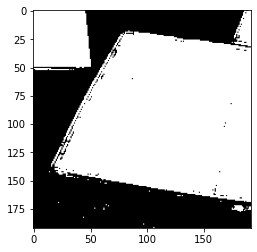

In [8]:
img='Limpio'


img_rgb = cv2.imread(os.path.join("img/",img+'.jpg'))


HLS= cv2.cvtColor(img_rgb,cv2.COLOR_RGB2HLS)
img_H_HLS = HLS[:, :, 0]
img_L_HLS = HLS[:, :, 1]
img_S_HLS = HLS[:, :, 2]


mask=np.zeros_like(img_rgb)
mask[img_S_HLS > 35]=255 


plt.imshow(mask,cmap='gray')

# Referencias 

[1] https://eficienciaenergetica.celsia.com/todo-lo-que-debes-saber-sobre-energia-solar-en-colombia/ <br><br>
[2] https://deep-solar-eye.github.io/